# FOMO Object Detection  - EI Linux Python SDK 
- By MJRovai @Set24

In [274]:
import sys, time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2
from edge_impulse_linux.image import ImageImpulseRunner

In [275]:
ls models

raspi-object-detection-linux-aarch64-float32.eim*
raspi-object-detection-linux-aarch64-FOMO-MobileNetV1-gray.eim*
raspi-object-detection-linux-aarch64-int8.eim*


In [276]:
# Settings
model_file = "raspi-object-detection-linux-aarch64-int8.eim"
model_path = "models/"+ model_file # Trained ML model from Edge Impulse

In [277]:
# Load the model file
runner = ImageImpulseRunner(model_path)

In [278]:
# Initialize model (and print information if it loads)
try:
    model_info = runner.init()
    print("Model name:\t", model_info['project']['name'])
    print("Model input:\t ({}x{}x{}x{})".format(model_info['model_parameters']['image_input_frames'], 
                                         model_info['model_parameters']['image_input_width'],
                                         model_info['model_parameters']['image_input_height'],
                                         model_info['model_parameters']['image_channel_count']))
    print("Model labels:\t {}".format(model_info['model_parameters']['labels']))
    
# Exit if we cannot initialize the model
except Exception as e:
    print("ERROR: Could not initialize model")
    print("Exception:", e)
    if (runner):
            runner.stop()
    sys.exit(1)

Model name:	 Raspi - Object Detection
Model input:	 (1x160x160x3)
Model labels:	 ['0', '1']


In [279]:
model_info

{'model_parameters': {'axis_count': 1,
  'frequency': 0,
  'has_anomaly': 0,
  'image_channel_count': 3,
  'image_input_frames': 1,
  'image_input_height': 160,
  'image_input_width': 160,
  'image_resize_mode': 'squash',
  'inferencing_engine': 4,
  'input_features_count': 25600,
  'interval_ms': 1,
  'label_count': 2,
  'labels': ['0', '1'],
  'model_type': 'constrained_object_detection',
  'sensor': 3,
  'slice_size': 6400,
  'threshold': 0.5,
  'use_continuous_mode': False},
 'project': {'deploy_version': 3,
  'id': 515477,
  'name': 'Raspi - Object Detection',
  'owner': 'MJRoBot (Marcelo Rovai)'}}

In [280]:
ls ./images/

1_box_1_wheel.jpg  2_wheel.jpg  box_2_wheel_1.jpg  box_3_wheel_4.jpg
1_wheel.jpg        box_1.jpg    box_2_wheel_2.jpg


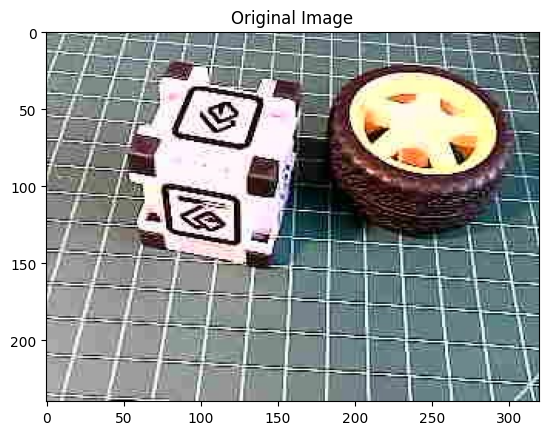

In [281]:
# Load the image
img_path = "./images/1_box_1_wheel.jpg"
orig_img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.title("Original Image")
plt.show()

In [282]:
features, cropped = runner.get_features_from_image_auto_studio_setings(img_rgb)
#features, cropped = runner.get_features_from_image_auto_studio_setings(orig_img)

In [283]:
cropped.shape

(160, 160, 3)

In [284]:
res=None
res = runner.classify(features)
res

{'result': {'bounding_boxes': [{'height': 16,
    'label': '1',
    'value': 0.90625,
    'width': 16,
    'x': 112,
    'y': 40},
   {'height': 8,
    'label': '0',
    'value': 0.75390625,
    'width': 8,
    'x': 48,
    'y': 56}]},
 'timing': {'anomaly': 0,
  'classification': 26,
  'dsp': 3,
  'json': 17,
  'stdin': 30}}

In [285]:
print('Found %d bounding boxes (%d ms.)' % (len(res["result"]["bounding_boxes"]), 
                                            res['timing']['dsp'] + res['timing']['classification']))
for bb in res["result"]["bounding_boxes"]:
    print('\t%s (%.2f): x=%d y=%d w=%d h=%d' 
          % (bb['label'], bb['value'], bb['x'], bb['y'], bb['width'], bb['height']))

Found 2 bounding boxes (29 ms.)
	1 (0.91): x=112 y=40 w=16 h=16
	0 (0.75): x=48 y=56 w=8 h=8


In [286]:
labels = ['box', 'wheel']

	Found 2 bounding boxes (latency: 29 ms)


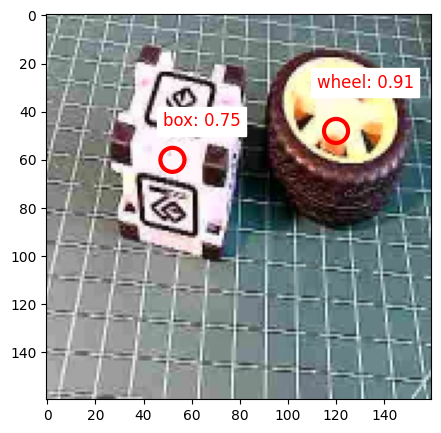

In [287]:
print('\tFound %d bounding boxes (latency: %d ms)' % (len(res["result"]["bounding_boxes"]), res['timing']['dsp'] + res['timing']['classification']))
plt.figure(figsize=(5,5))
plt.imshow(cropped)

# Go through each of the returned bounding boxes
bboxes = res['result']['bounding_boxes']
for bbox in bboxes:

    # Get the corners of the bounding box
    left = bbox['x']
    top = bbox['y']
    width = bbox['width']
    height = bbox['height']
    
    # Draw a circle centered on the detection
    circ = plt.Circle((left+width//2, top+height//2), 5, 
                     fill=False, color='red', linewidth=3)
    plt.gca().add_patch(circ)
    class_id = int(bbox['label'])
    class_name = labels[class_id]
    plt.text(left, top-10, f'{class_name}: {bbox["value"]:.2f}', 
              color='red', fontsize=12, backgroundcolor='white')

#plt.title('Detected Objects')
plt.show()


In [263]:
def display_result(img_path):
    orig_img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

    features, cropped = runner.get_features_from_image_auto_studio_setings(img_rgb)
    res=None
    res = runner.classify(features)
    print('\tFound %d objects (latency: %d ms)' 
          % (len(res["result"]["bounding_boxes"]), 
             res['timing']['dsp'] + res['timing']['classification']))

    plt.figure(figsize=(5,5))
    #cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
    plt.imshow(cropped)
    
    # Go through each of the returned bounding boxes
    bboxes = res['result']['bounding_boxes']
    for bbox in bboxes:
    
        # Get the corners of the bounding box
        left = bbox['x']
        top = bbox['y']
        width = bbox['width']
        height = bbox['height']
        
        # Draw a circle centered on the detection
        circ = plt.Circle((left+width//2, top+height//2), 5, 
                         fill=False, color='red', linewidth=4)
        plt.gca().add_patch(circ)
        class_id = int(bbox['label'])
        class_name = labels[class_id]
        plt.text(left, top-10, f'{class_name}: {bbox["value"]:.2f}', 
                  color='red', fontsize=12, backgroundcolor='white')
    
    #plt.title('Detected Objects')
    plt.show()

	Found 1 objects (latency: 35 ms)


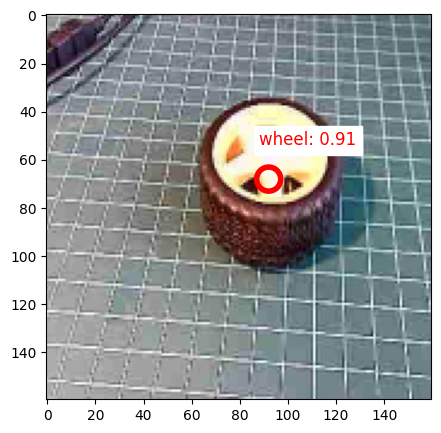

In [268]:
img_path = "./images/1_wheel.jpg"
display_result(img_path)

	Found 1 objects (latency: 17 ms)


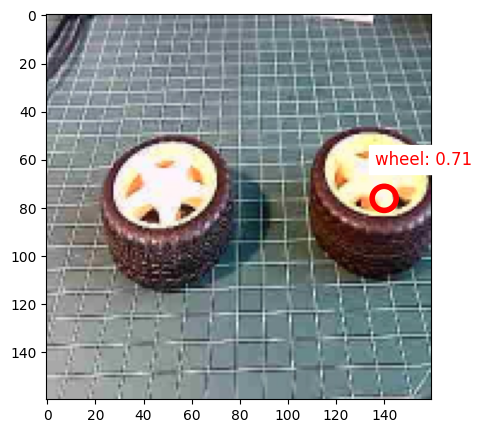

In [265]:
img_path = "./images/2_wheel.jpg"
display_result(img_path)

	Found 3 objects (latency: 21 ms)


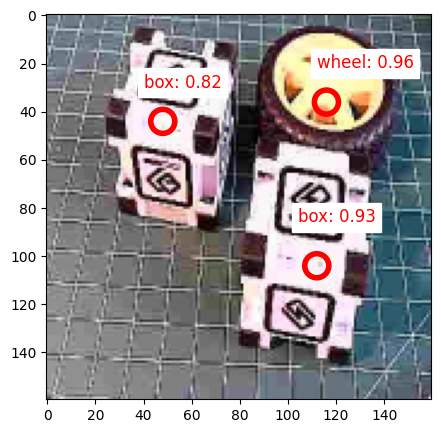

In [266]:
img_path = "./images/box_2_wheel_1.jpg"
display_result(img_path)

	Found 4 objects (latency: 13 ms)


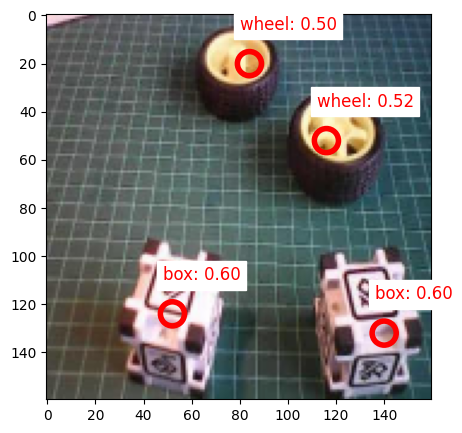

In [273]:
img_path = "./images/box_2_wheel_2.jpg"
display_result(img_path)

	Found 4 objects (latency: 14 ms)


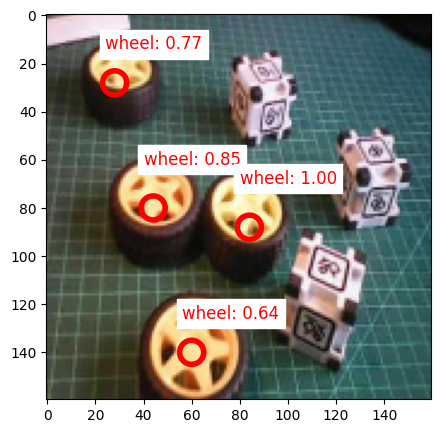

In [269]:
img_path = "./images/box_3_wheel_4.jpg"
display_result(img_path)

In [204]:
#runner.stop()
#model_info = runner.init(debug=True)

img_path = "./images/box_3_wheel_4.jpg"
orig_img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
features, cropped = runner.get_features_from_image(img_rgb)
res = runner.classify(features)

In [206]:
len(features)

25600

In [136]:
res

{'result': {'bounding_boxes': [{'height': 8,
    'label': '1',
    'value': 0.7734375,
    'width': 8,
    'x': 24,
    'y': 24},
   {'height': 16,
    'label': '1',
    'value': 0.84765625,
    'width': 8,
    'x': 40,
    'y': 72},
   {'height': 16,
    'label': '1',
    'value': 0.99609375,
    'width': 8,
    'x': 80,
    'y': 80},
   {'height': 8,
    'label': '1',
    'value': 0.64453125,
    'width': 8,
    'x': 56,
    'y': 136}]},
 'timing': {'anomaly': 0,
  'classification': 19,
  'dsp': 1,
  'json': 12,
  'stdin': 35}}